## Question #3: Is there a relationship between the runtime of movies and their profitability? 
### Does a movie’s runtime impact its profitability? This analysis examines the relationship between runtime and financial success across various genres. We aim to determine if longer or shorter movies are more profitable and provide insights into the factors driving box office performance

In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Filepath
filepath = "random_v3_df.csv"

# Read the CSV file, converting relevant columns to correct data types
df = pd.read_csv(filepath)
df.shape

# Create Profit Column
# Convert `Budget_$` and `total_revenue_$` columns to numeric, after removing '$' and ','
df['Budget_$'] = df['Budget_$'].astype(str).str.replace(r'[$,]', '', regex=True)
df['total_revenue_$'] = df['total_revenue_$'].astype(str).str.replace(r'[$,]', '', regex=True)
df['Budget_$'] = pd.to_numeric(df['Budget_$'])
df['total_revenue_$'] = pd.to_numeric(df['total_revenue_$'])
# Calculate Profit
df['profit'] = df['total_revenue_$'] - df['Budget_$']

In [3]:
df.head()

,title_without_year,year,main_genre,MPAA-Rating,Runtime,Distributor,Budget_$,Domestic_$,International_$,total_revenue_$,profit
0,Avengers: Endgame,2019,Action,PG-13,181,Walt Disney Studios Motion Pictures,356000000,"$858,373,000","$1,939,128,328",2797501328,2441501328
1,Avatar,2009,Sci-Fi,PG-13,162,Twentieth Century Fox,237000000,"$749,766,139","$1,993,811,448",2743577587,2506577587
2,Star Wars: Episode VII - The Force Awakens,2015,Sci-Fi,PG-13,138,Walt Disney Studios Motion Pictures,245000000,"$936,662,225","$1,131,561,399",2068223624,1823223624
3,Jurassic World,2015,Adventure,PG-13,124,Universal Pictures,150000000,"$652,270,625","$1,018,130,012",1670400637,1520400637
4,The Lion King,2019,Family,PG,118,Walt Disney Studios Motion Pictures,260000000,"$543,638,043","$1,113,305,351",1656943394,1396943394


##### The average run time by year (1999-2019)

In [4]:
# The average run time by year
average_runtime = df.groupby('year')['Runtime'].mean()
average_runtime

year
1999    125.600000
2000    110.753247
2001    109.000000
2002    106.791667
2003    109.142857
2004    108.603053
2005    110.655172
2006    107.422414
2007    110.105882
2008    108.050420
2009    107.765217
2010    107.361702
2011    107.274809
2012    109.825688
2013    110.785124
2014    110.626168
2015    111.600000
2016    111.925926
2017    112.417476
2018    110.410526
2019    114.292035
Name: Runtime, dtype: float64

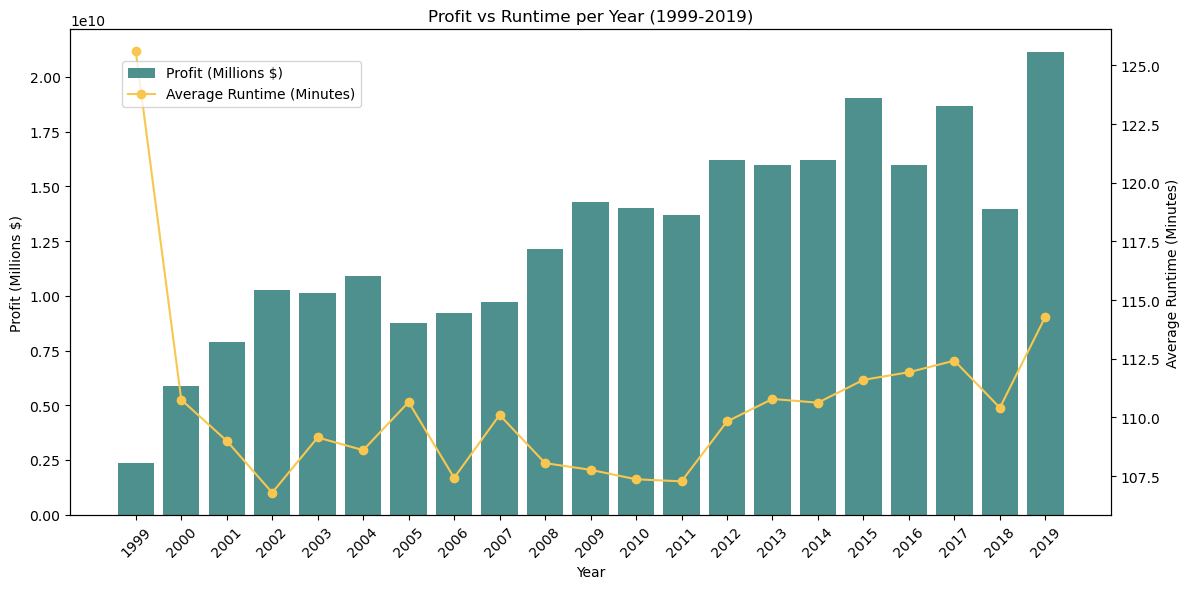

In [89]:
# Filter data for the years 1999 to 2019
df_filtered = df[(df['year'] >= 1999) & (df['year'] <= 2019)]

# Group by year to calculate the average runtime and total profit
grouped = df_filtered.groupby('year').agg({
    'Runtime': 'mean',
    'profit': 'sum'
}).reset_index()

# Extract years, average runtimes, and profits
years = grouped['year']
average_runtimes = grouped['Runtime']
profits_millions = grouped['profit']

# Create bar chart for profit vs. runtime per year
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the profit
ax1.bar(years, profits_millions, color='#4D908E', label='Profit (Millions $)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit (Millions $)')
ax1.set_title('Profit vs Runtime per Year (1999-2019)')
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

# Creating a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plotting the average runtime
ax2.plot(years, average_runtimes, color= '#F9C74F', marker='o', label='Average Runtime (Minutes)')
ax2.set_ylabel('Average Runtime (Minutes)', color='black')

# Adding the legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.tight_layout()
plt.show()

#### Scatterplot and bar graph

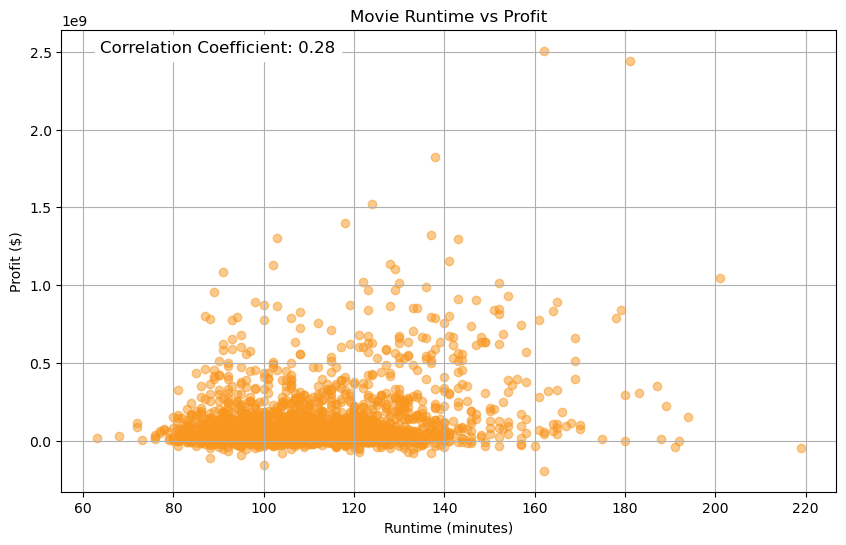

In [93]:
# Calculate the correlation coefficient
correlation = df['Runtime'].corr(df['profit'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['profit'], alpha=0.5, color= '#F8961E')
plt.title('Movie Runtime vs Profit')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Profit ($)')
plt.grid(True)

# Adding the correlation coefficient to the plot
plt.annotate(f'Correlation Coefficient: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, backgroundcolor='white')

plt.show()

### Analysis #1
##### The scatterplot shows a correlation coefficient of 0.28 indicates a weak positive linear relationship between runtime and profit

In [ ]:
# Extract runtimes and profits
runtimes = df['Runtime']
profits = df['profit']

# Create bar chart for runtime vs. profit
plt.figure(figsize=(12, 6))
plt.bar(runtimes, profits, color='skyblue')
plt.title('Profit vs Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Profit ($)')
plt.tight_layout()

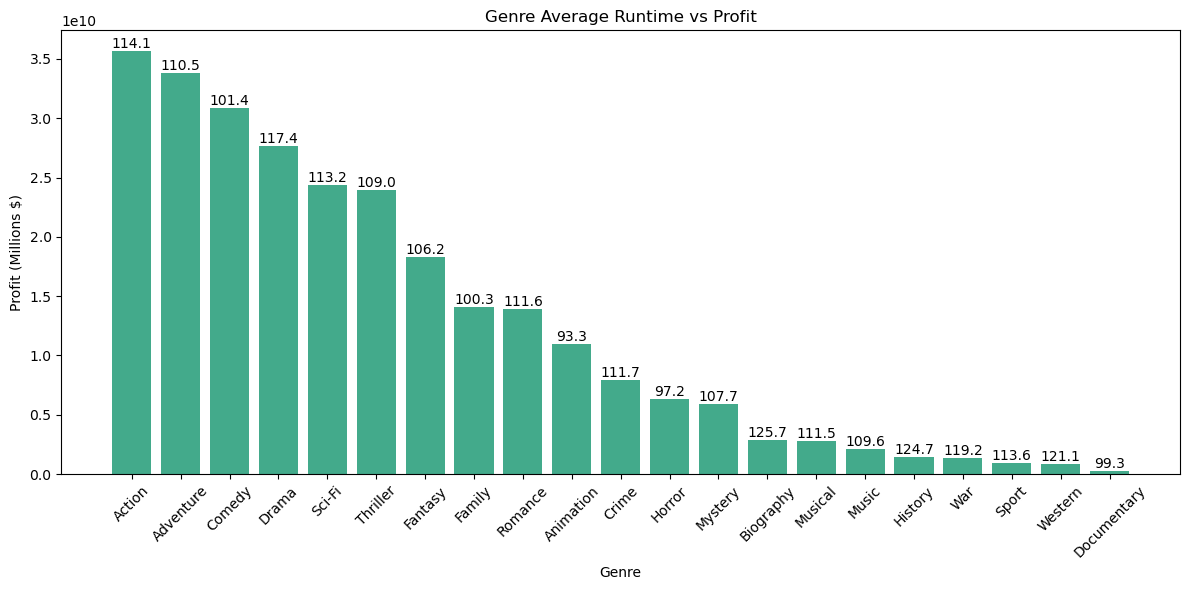

In [99]:
# Calculate average runtime and total profit by genre
genre_stats = df.groupby('main_genre').agg({
    'Runtime': 'mean',
    'profit': 'sum'
}).reset_index()

# Sort the DataFrame by Runtime in ascending order
genre_stats = genre_stats.sort_values(by='profit', ascending=False)

# Extract genres, average runtimes, and profits
genres = genre_stats['main_genre']
average_runtimes = genre_stats['Runtime']
profits_millions = genre_stats['profit']

# Create bar chart for genre runtime vs. profit
plt.figure(figsize=(12, 6))
bars = plt.bar(genres, profits_millions, color='#43AA8B')
plt.xlabel('Genre')
plt.ylabel('Profit (Millions $)')
plt.title('Genre Average Runtime vs Profit')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding average runtime labels above bars
for bar, avg_runtime in zip(bars, average_runtimes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(avg_runtime, 1), ha='center', va='bottom')

# Display the chart
plt.show()

### Analysis #2
#### The bar graph above illustrates the average runtime and profit for each genre. There appears to be little correlation between the two variables. For instance, 'Action' has the highest profit with a runtime of 114 minutes, whereas 'Biography' and 'History' genres have runtimes of 125 and 124 minutes respectively, yet only achieve a fraction of the profit generated by 'Action'.

In [68]:
list_of_genre_df = df['main_genre'].unique()
list_of_genre_df 

array(['Action', 'Sci-Fi', 'Adventure', 'Family', 'Musical', 'Fantasy',
       'Crime', 'Animation', 'Drama', 'Thriller', 'Comedy', 'Mystery',
       'Romance', 'Horror', 'War', 'Western', 'History', 'Music',
       'Biography', 'Sport', 'Documentary'], dtype=object)

In [102]:
# Calculate average runtime and total profit by genre
def profit_vs_runtime_genre(specific_genre):
    
    df_genre = df[df['main_genre'] == specific_genre]
    
    genre_stats = df_genre.groupby('year').agg({
        'Runtime': 'mean',
        'profit': 'sum'
    }).reset_index()
    
    # Extract genres, average runtimes, and profits
    years = genre_stats['year']
    average_runtimes = genre_stats['Runtime']
    profits_millions = genre_stats['profit']
    
    # Print the values in a table-like format
    print(f"\nYearly data for genre: {specific_genre}")
    print(f"{'Year':<10}{'Average Runtime':<25}{'Profit (Millions $)':<20}")
    print('-' * 55)
    for year, avg_runtime, profit in zip(years, average_runtimes, profits_millions):
        print(f"{year:<10}{avg_runtime:<25.2f}${profit:<20.2f}")
        
    # Create bar chart for genre runtime vs. profit
    plt.figure(figsize=(12, 6))
    bars = plt.bar(years, profits_millions, color='#F9C74F')
    plt.xlabel('Year')
    plt.ylabel('Profit (Millions $)')
    plt.title(f'{specific_genre} Average Runtime vs Profit')
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    
    # Adding average runtime labels above bars
    for bar, avg_runtime in zip(bars, average_runtimes):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval, round(avg_runtime, 1), ha='center', va='bottom')
    
    # Display the chart
    plt.show()

##### The bar graph below shows the average runtime and profit of the 'Action', 'Sci-Fi', 'Documentary', 'Western', 'Sport', and 'War' genres from 1999 to 2019. These specific genres were selected because they represent the highest and lowest profitability.


##### Note: For some graphs, certain years appear empty. This is due to the randomizer we used during data cleaning.”




Yearly data for genre: Action
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
2000      114.38                   $941785821.00        
2001      113.00                   $362619711.00        
2002      114.09                   $1862712120.00       
2003      119.16                   $2026153089.00       
2004      110.89                   $815729987.00        
2005      118.67                   $158276700.00        
2006      117.14                   $538232486.00        
2007      114.43                   $1335477779.00       
2008      116.64                   $1310140081.00       
2009      120.33                   $2581539071.00       
2010      109.71                   $936145807.00        
2011      108.27                   $2640791755.00       
2012      101.62                   $1083021061.00       
2013      116.31                   $3271954218.00       
2014      106.00                   $1785783396.00       
20

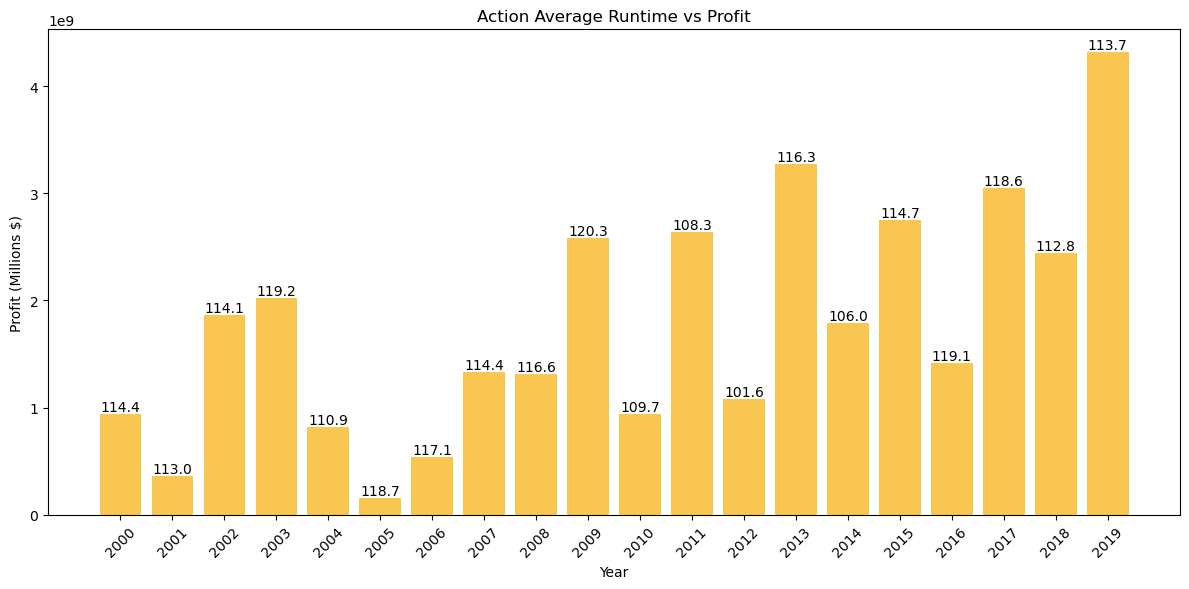

In [103]:
profit_vs_runtime_genre('Action')


Yearly data for genre: Sci-Fi
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
1999      117.00                   $33107777.00         
2001      92.50                    $433203362.00        
2002      98.00                    $1000575156.00       
2003      122.00                   $398976753.00        
2004      108.50                   $726822376.00        
2005      103.67                   $20293767.00         
2007      119.00                   $597153931.00        
2008      88.20                    $419856116.00        
2009      113.67                   $3668265304.00       
2010      114.60                   $58117070.00         
2011      112.71                   $1322957460.00       
2012      115.29                   $1535655332.00       
2013      115.00                   $1374249457.00       
2014      127.56                   $3168089051.00       
2015      111.83                   $2286520518.00       
20

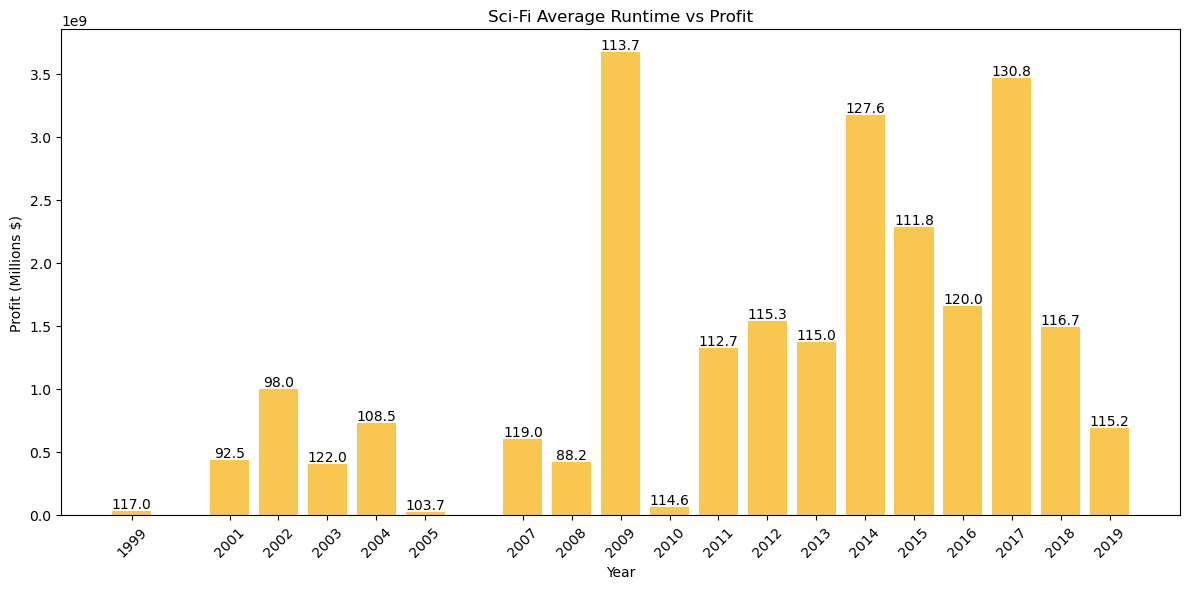

In [104]:
profit_vs_runtime_genre('Sci-Fi')


Yearly data for genre: Documentary
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
2000      115.00                   $63365580.00         
2002      87.00                    $74493831.00         
2003      96.00                    $-2154917.00         
2004      100.00                   $20580757.00         
2009      127.00                   $-2563491.00         
2010      104.00                   $3090556.00          
2011      84.00                    $9663238.00          
2012      93.00                    $20726956.00         
2013      92.00                    $5980157.00          
2016      96.00                    $37282086.00         
2017      98.00                    $4433926.00          


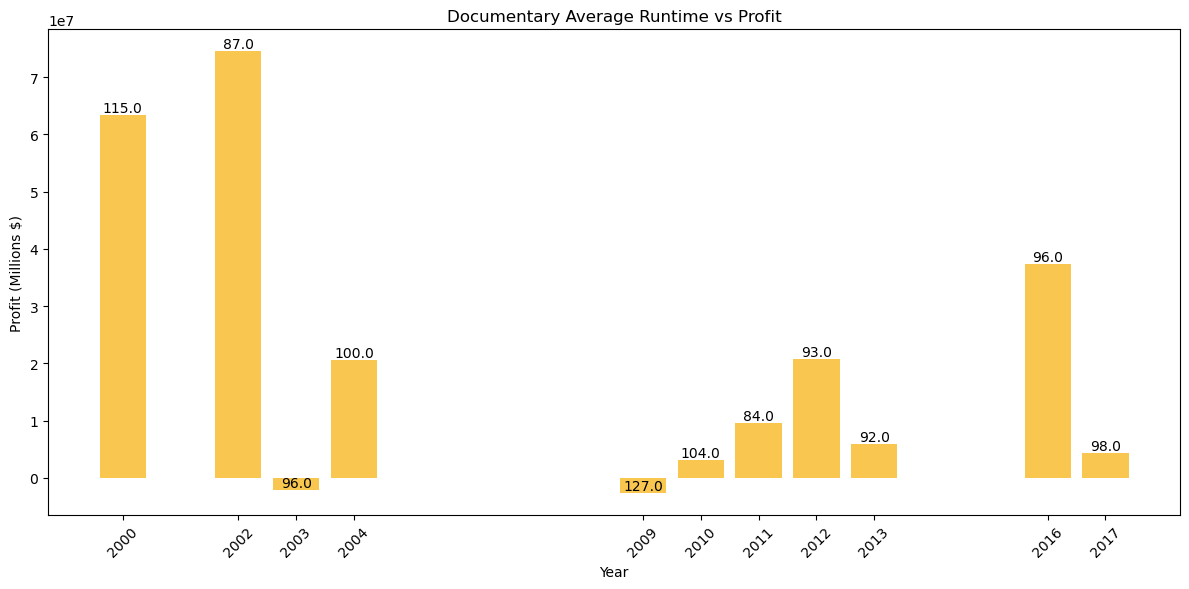

In [105]:
profit_vs_runtime_genre('Documentary')


Yearly data for genre: Western
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
2005      129.00                   $67400065.00         
2006      121.00                   $-2954638.00         
2007      122.00                   $15016220.00         
2008      115.00                   $7712362.00          
2010      97.00                    $147283673.00        
2011      119.00                   $11822325.00         
2013      150.00                   $45502115.00         
2014      116.00                   $47189756.00         
2015      139.50                   $426895318.00        
2016      132.00                   $72360636.00         


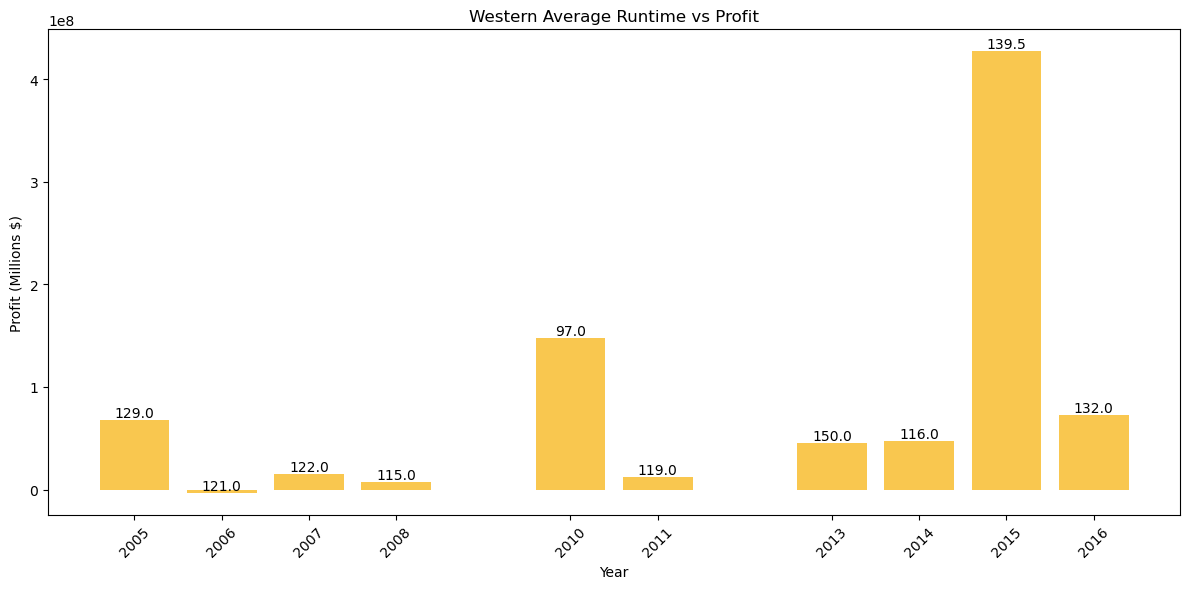

In [106]:
profit_vs_runtime_genre('Western')


Yearly data for genre: Sport
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
2000      126.00                   $-40540573.00        
2001      89.00                    $-9217324.00         
2003      140.00                   $61336445.00         
2005      103.00                   $74065339.00         
2006      97.00                    $50325124.00         
2008      108.50                   $-51314320.00        
2009      129.00                   $280208309.00        
2010      108.50                   $168653377.00        
2011      133.00                   $60206216.00         
2012      116.00                   $-12057884.00        
2014      124.00                   $13483455.00         
2015      128.00                   $152191153.00        
2018      130.00                   $164215889.00        
2019      109.00                   $15766787.00         


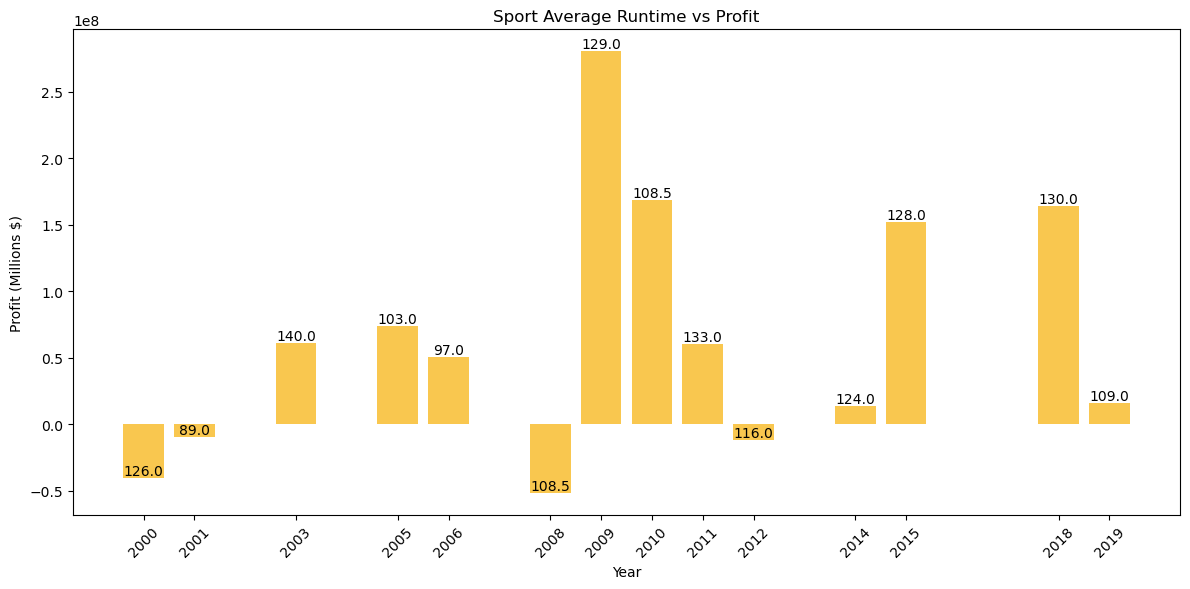

In [107]:
profit_vs_runtime_genre('Sport')


Yearly data for genre: War
Year      Average Runtime          Profit (Millions $) 
-------------------------------------------------------
2000      128.00                   $11732303.00         
2001      131.00                   $28976270.00         
2002      131.50                   $1947828.00          
2004      150.50                   $95866049.00         
2005      76.00                    $26746888.00         
2006      129.00                   $22685132.00         
2007      92.00                    $29811540.00         
2008      106.50                   $-2647932.00         
2009      112.50                   $78326543.00         
2010      97.00                    $60073390.00         
2014      119.67                   $779568558.00        
2015      111.00                   $23967255.00         
2016      139.00                   $140563636.00        
2018      122.00                   $11224198.00         
2019      108.00                   $76335025.00         


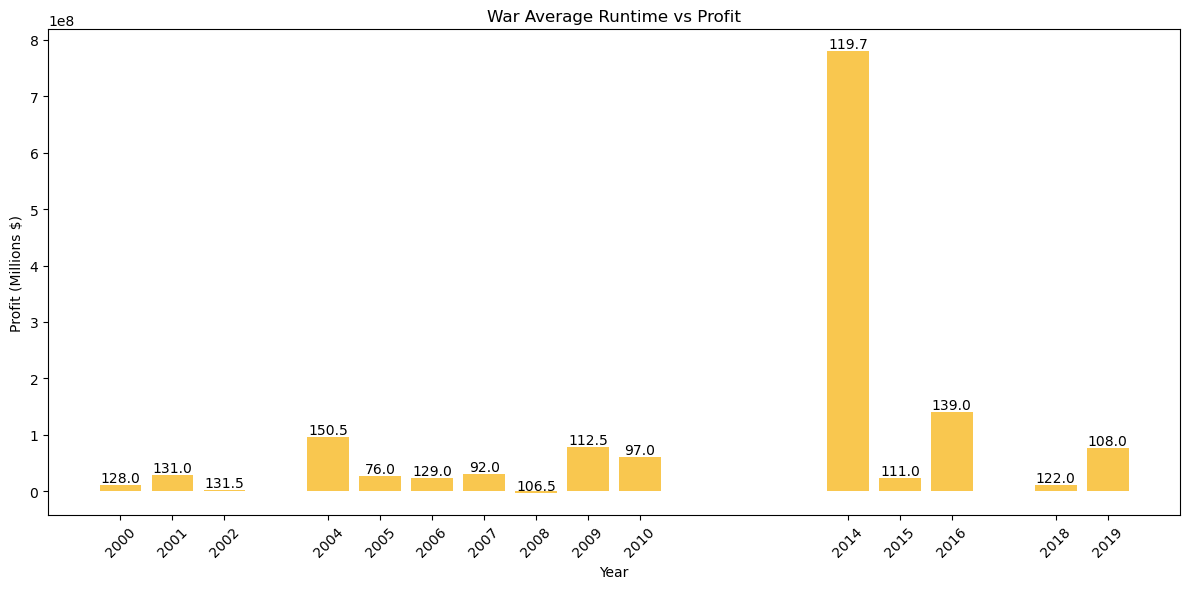

In [108]:
profit_vs_runtime_genre('War')

## Conclusion
#### The analysis indicates that the runtime of a movie does not significantly enhance its profitability, regardless of genre. Despite variations in runtime, there is little to no evident correlation with financial success